In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB


In [3]:

x, y = make_blobs(100, 2, centers=2, random_state=42, cluster_std=1.5)


In [4]:
# make data_frame to example

df_x = pd.DataFrame(x, columns=['feature_1', 'feature_2'])
df_y = pd.DataFrame(y, columns=['label'])

data = pd.concat([df_x, df_y],1); data

feature_1  feature_2  label
0   -3.227959   8.735798      0
1    6.264456   3.553873      1
2   -3.325772   9.180670      0
3    5.872969   4.818359      1
4    4.981069   3.933884      1
..        ...        ...    ...
95  -0.962698  10.411206      0
96  -1.136094   9.507413      0
97   3.369688  -0.299101      1
98  -2.838705   9.549955      0
99  -2.501527   8.662405      0

[100 rows x 3 columns]

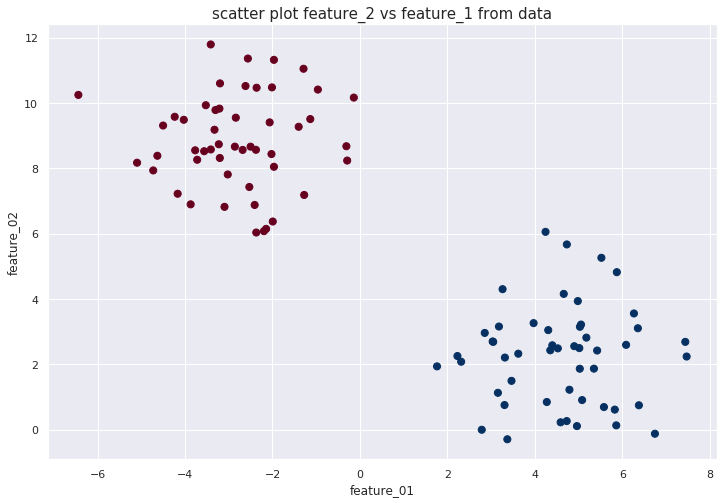

In [5]:


fig, axe = plt.subplots(figsize=(12,8))
plt.scatter(x[:, 0], x[:, 1], s=50, c=y, cmap='RdBu') # x[:,0] equivale data['feature_1'], c=y equivale c=data['label']
plt.xlabel('feature_01')
plt.ylabel('feature_02')
plt.title('scatter plot feature_2 vs feature_1 from data', size=15)
plt.show()




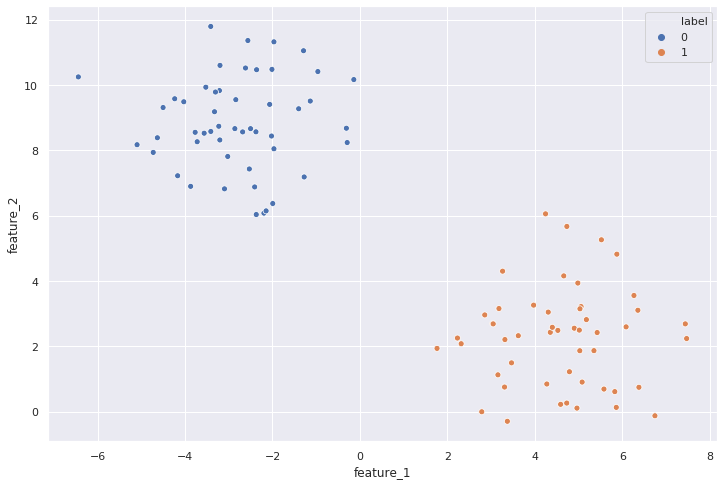

In [6]:

#The same of above

fig, axe = plt.subplots(figsize=(12,8))
sns.scatterplot(x='feature_1', y='feature_2', data=data, hue='label')


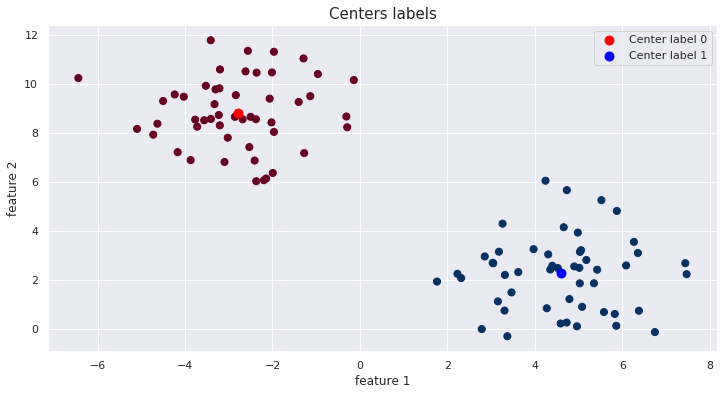

In [7]:

label_0 = data[data['label'] == 0]
label_0_feat_1_mean = label_0['feature_1'].mean()
label_0_feat_2_mean = label_0['feature_2'].mean()

label_1 = data[data['label'] == 1]
label_1_feat_1_mean = label_1['feature_1'].mean()
label_1_feat_2_mean = label_1['feature_2'].mean()



fig, axe = plt.subplots(figsize=(12,6))
plt.scatter(data['feature_1'], data['feature_2'], s=50, c=data['label'], cmap='RdBu')
plt.scatter(label_0_feat_1_mean, label_0_feat_2_mean, color='red', s=80, label='Center label 0')
plt.scatter(label_1_feat_1_mean, label_1_feat_2_mean, color='blue', s=80, label='Center label 1')
plt.legend(loc='best')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Centers labels', size=15)
plt.show()


x_meshG.shape:  (25, 20)
y_meshG.shape:  (25, 20)
z.shape:  (25, 20)


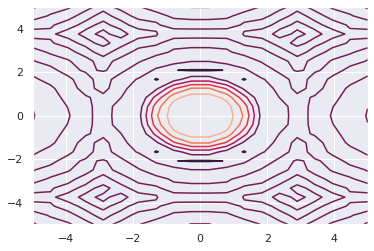

In [8]:

#alguns testes com meshgrid

x = np.linspace(-5,5,20)
y = np.linspace(-5,5,25)

x_meshG, y_meshG = np.meshgrid(x, y)
#z = x_meshG**2 + y_meshG**2
z = np.sin(x_meshG**2 + y_meshG**2) / (x_meshG**2 + y_meshG**2) # z = f(x,y) = sin(x^2 + y^2)/(x^2 + y^2)


print('x_meshG.shape: ', x_meshG.shape)
print('y_meshG.shape: ', y_meshG.shape)
print('z.shape: ', z.shape)
#print('x_meshgrid:\n', x_meshG)
#print('y_meshgrid:\n', y_meshG)


#plt.scatter(x_meshG, y_meshG, color='red', s=10)
plt.contour(x_meshG, y_meshG, z)
plt.show()

In [9]:

# new data
rns = np.random.RandomState(42)
x_data = ([-16,20] * rns.rand(2000,2)) + [8, -4] # esses valores escolhidos para somar e multiplicar foram escolhidos de forma meio arbiraria, observando-se apenas os intervalos dos valores gerados, experimente executar essa cécula e a proxima sem esses vetores que estão somando e multiplicando.
# rns.rand(2000,2) gera 2000 linhas com duas colunas, utilizando RandomState de 42, entre 0 e 1.
# Observe que pelo realizado acima é gerado em x_data duas colunas, em que a primeira gera valores entre:
# [-8,8], e a segunda coluna entre, [-4,16]
# 

# model
model_gaussianNB = GaussianNB()
model_gaussianNB.fit(data[['feature_1','feature_2']], data['label'])

# Applying the model a new data

y_new = model_gaussianNB.predict(x_data)


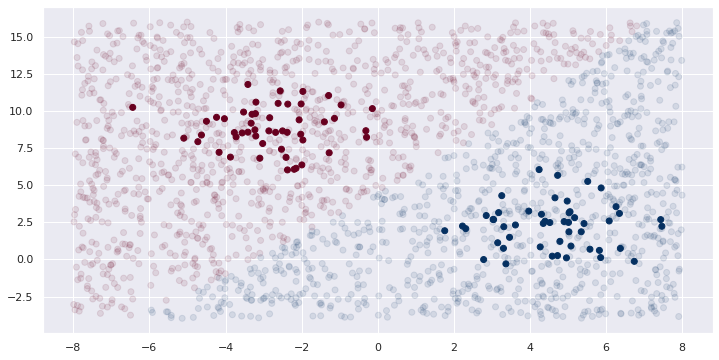

In [10]:

fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(x_data[:,0], x_data[:,1], c=y_new, cmap='RdBu', alpha=0.1)
plt.scatter(data['feature_1'],data['feature_2'], c=data['label'], cmap='RdBu')
plt.show()

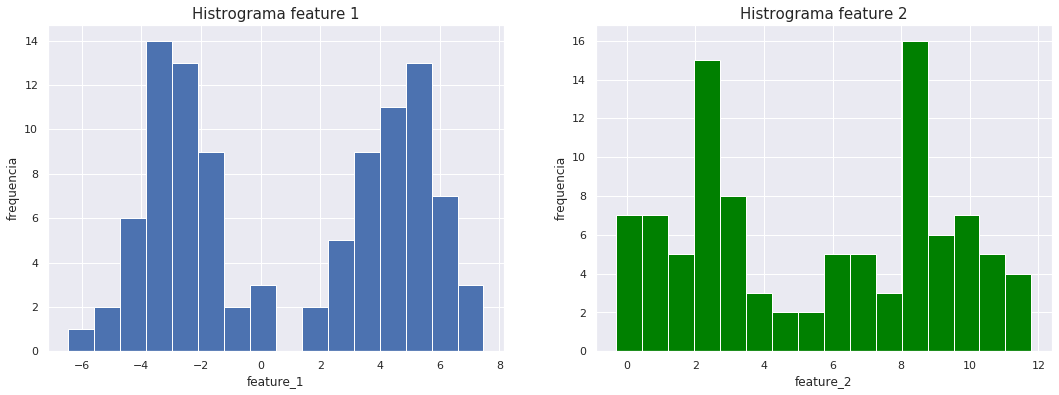

In [11]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
ax1.hist(data['feature_1'], bins=16)
ax1.set_xlabel('feature_1')
ax1.set_ylabel('frequencia')
ax1.set_title('Histrograma feature 1', size=15)

ax2.hist(data['feature_2'], color='green', bins=16)
ax2.set_xlabel('feature_2')
ax2.set_ylabel('frequencia')
ax2.set_title('Histrograma feature 2', size=15)
plt.show()

Apesar de termos utilizado o Gaussian Naive Bayes, apenas para exemplo, podemos observar que nenhuma das colunas que utilizamos possui distribuição normal/Gaussiana, como é suposto para a utilização desse modelo. 

In [12]:

a = np.array([1,2,3,4,5])
c = np.vstack(a)
d = np.vstack([a])
k = np.array([[1,2,3],[2,4,5]])

b = c.T

print(a)
print(c)
print(b)
print(d)
print(k)
print(k.mean(0))
print(k.prod(0))

[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]
[[1 2 3 4 5]]
[[1 2 3 4 5]]
[[1 2 3]
 [2 4 5]]
[1.5 3.  4. ]
[ 2  8 15]


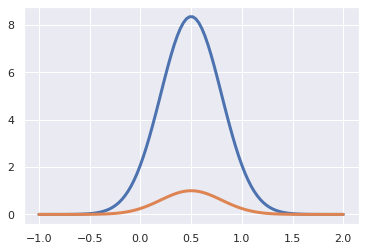

In [82]:


def dist_normal(x, med=0.5, s=0.3):
    y = (1/s*np.sqrt(2*np.pi))*(np.exp(-0.5*((x-med)**2)/(s**2)))
    return y

def dist_2(x, med=0.5, s=0.3):
    y = (np.exp(-0.5*((x-med)**2)/(s**2)))
    return y

x = np.linspace(-1,2,100)
y = dist_normal(x)
y_2 = dist_2(x)

plt.plot(x,y, lw=3)
plt.plot(x,y_2, lw=3)
plt.show()

[[-1.   -1.  ]
 [-0.25 -1.  ]
 [ 0.5  -1.  ]
 [ 1.25 -1.  ]
 [ 2.   -1.  ]
 [-1.   -0.25]
 [-0.25 -0.25]
 [ 0.5  -0.25]
 [ 1.25 -0.25]
 [ 2.   -0.25]
 [-1.    0.5 ]
 [-0.25  0.5 ]
 [ 0.5   0.5 ]
 [ 1.25  0.5 ]
 [ 2.    0.5 ]
 [-1.    1.25]
 [-0.25  1.25]
 [ 0.5   1.25]
 [ 1.25  1.25]
 [ 2.    1.25]
 [-1.    2.  ]
 [-0.25  2.  ]
 [ 0.5   2.  ]
 [ 1.25  2.  ]
 [ 2.    2.  ]]

[[-1.   -0.25  0.5   1.25  2.  ]
 [-1.   -0.25  0.5   1.25  2.  ]
 [-1.   -0.25  0.5   1.25  2.  ]
 [-1.   -0.25  0.5   1.25  2.  ]
 [-1.   -0.25  0.5   1.25  2.  ]]

[[-1.   -1.   -1.   -1.   -1.  ]
 [-0.25 -0.25 -0.25 -0.25 -0.25]
 [ 0.5   0.5   0.5   0.5   0.5 ]
 [ 1.25  1.25  1.25  1.25  1.25]
 [ 2.    2.    2.    2.    2.  ]]



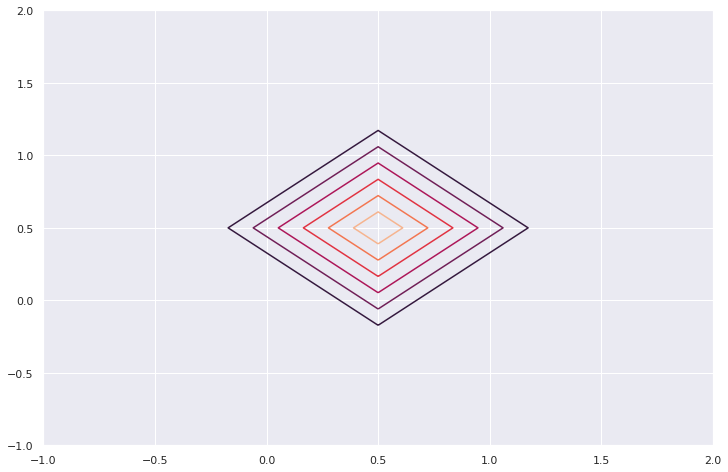

In [107]:

x = np.linspace(-1,2,5)
y = np.linspace(-1,2,5)

x_meshG, y_meshG = np.meshgrid(x,y)
meshG_v = np.vstack([x_meshG.ravel(), y_meshG.ravel()]).T

z = dist_normal(meshG_v).prod(1) # fazendo o produto das linhas
print(meshG_v, end='\n\n')
print(x_meshG, end='\n\n')
print(y_meshG, end='\n\n')
#print(z.shape)
#print(np.vstack([x_meshG.ravel(), y_meshG.ravel()]))
#plt.scatter(x_meshG, y_meshG)

fig, axe = plt.subplots(figsize=(12,8))
plt.contour(x_meshG, y_meshG, z.reshape(x_meshG.shape))
plt.show()


In [68]:

x = [1,2,3]
y = [2,4,5]

print(np.vstack([x,y]).T)


[[1 2]
 [2 4]
 [3 5]]


[1.  1.8 2.6 3.4 4.2 5. ]
[[7 4 5 7 3]
 [5 5 7 2 3]
 [7 3 3 5 4]
 [3 6 5 2 4]
 [6 6 2 4 5]]


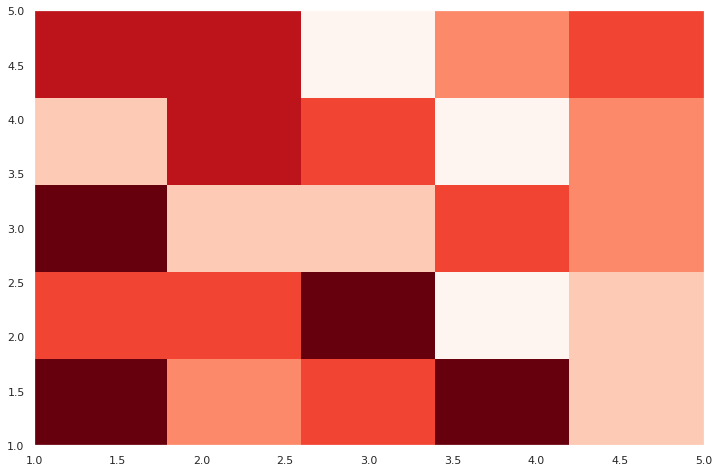

In [178]:

x = np.linspace(1,5, 6)
y = np.linspace(1,5,6)
print(x)
#xMesh, yMesh = np.meshgrid(x,y)

rns = np.random.RandomState(42)
c = rns.randint(1,8,25)
#print(c)

#m = np.ma.masked_array(c).reshape(xMesh.shape)
m = c.reshape(5,5)
print(m)

#print(m)

fig, axe = plt.subplots(figsize=(12,8))
#plt.contour(x_meshG, y_meshG, z.reshape(x_meshG.shape))
plt.pcolor(x, y, m, cmap='Reds')

In [126]:

x = np.array([(1,2),(2,3)], dtype=[('c',int),('b',float)])

type(x[0][0])




numpy.int64